In [10]:
from openpyxl import load_workbook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
wb = load_workbook("../1.xlsx")
sheets = wb.worksheets
sheet_point_list = sheets[0]
sheet_distance = sheets[1]
targetCamp = "red"
enemyCamp = "blue"
pointListAll = np.array(list(sheet_point_list.values)[1:])

pointMap = {}
for row in np.around(np.array(pointListAll[:, [0, 1, 2]], float), 2):
    pointMap[int(row[0])] = row

pointList = pointListAll[pointListAll[:, 3] == targetCamp]
pointList = pointList[:, [0, 1, 2]]
pointList = np.around(np.array(pointList, float), 2)

pointEnemyList = pointListAll[pointListAll[:, 3] == enemyCamp]
pointEnemyList = pointEnemyList[:, [0, 1, 2]]
pointEnemyList = np.around(np.array(pointEnemyList, float), 2)

In [43]:
# 导入攻击路线图
wb = load_workbook("./Red Team Attack Plan.xlsx")
redTeamAttackPlanSheet = wb.worksheets[0]
redTeamAttackPlan = np.array(list(redTeamAttackPlanSheet.values), str)[:, 2:]
redTeamAttackPlanLinerList = redTeamAttackPlan.reshape(-1)
redTeamAttackPlanLinerList = np.array(np.unique(redTeamAttackPlanLinerList[redTeamAttackPlanLinerList != 'None']), int)
redTeamAttackPlan

array([['111', '112', '131', '90', '91', '96', '76', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None', 'None'],
       ['120', '117', '130', '112', '131', '90', '91', '96', '76',
        'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None', 'None'],
       ['98', '99', '100', '120', '117', '130', '112', '131', '90', '91',
        '96', '76', 'None', 'None', 'None', 'None', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None'],
       ['331', '330', '97', '121', '94', '120', '117', '130', '112',
        '131', '90', '91', '96', '76', 'None', 'None', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None'],
       ['292', '350', '293', '294', '295', '312', '313', '28', '49',
        '89', '75', '118', '121', '94', '120', '117', '130', '112',
        '131', '90', '91', '96', '76', 'None'],
       ['

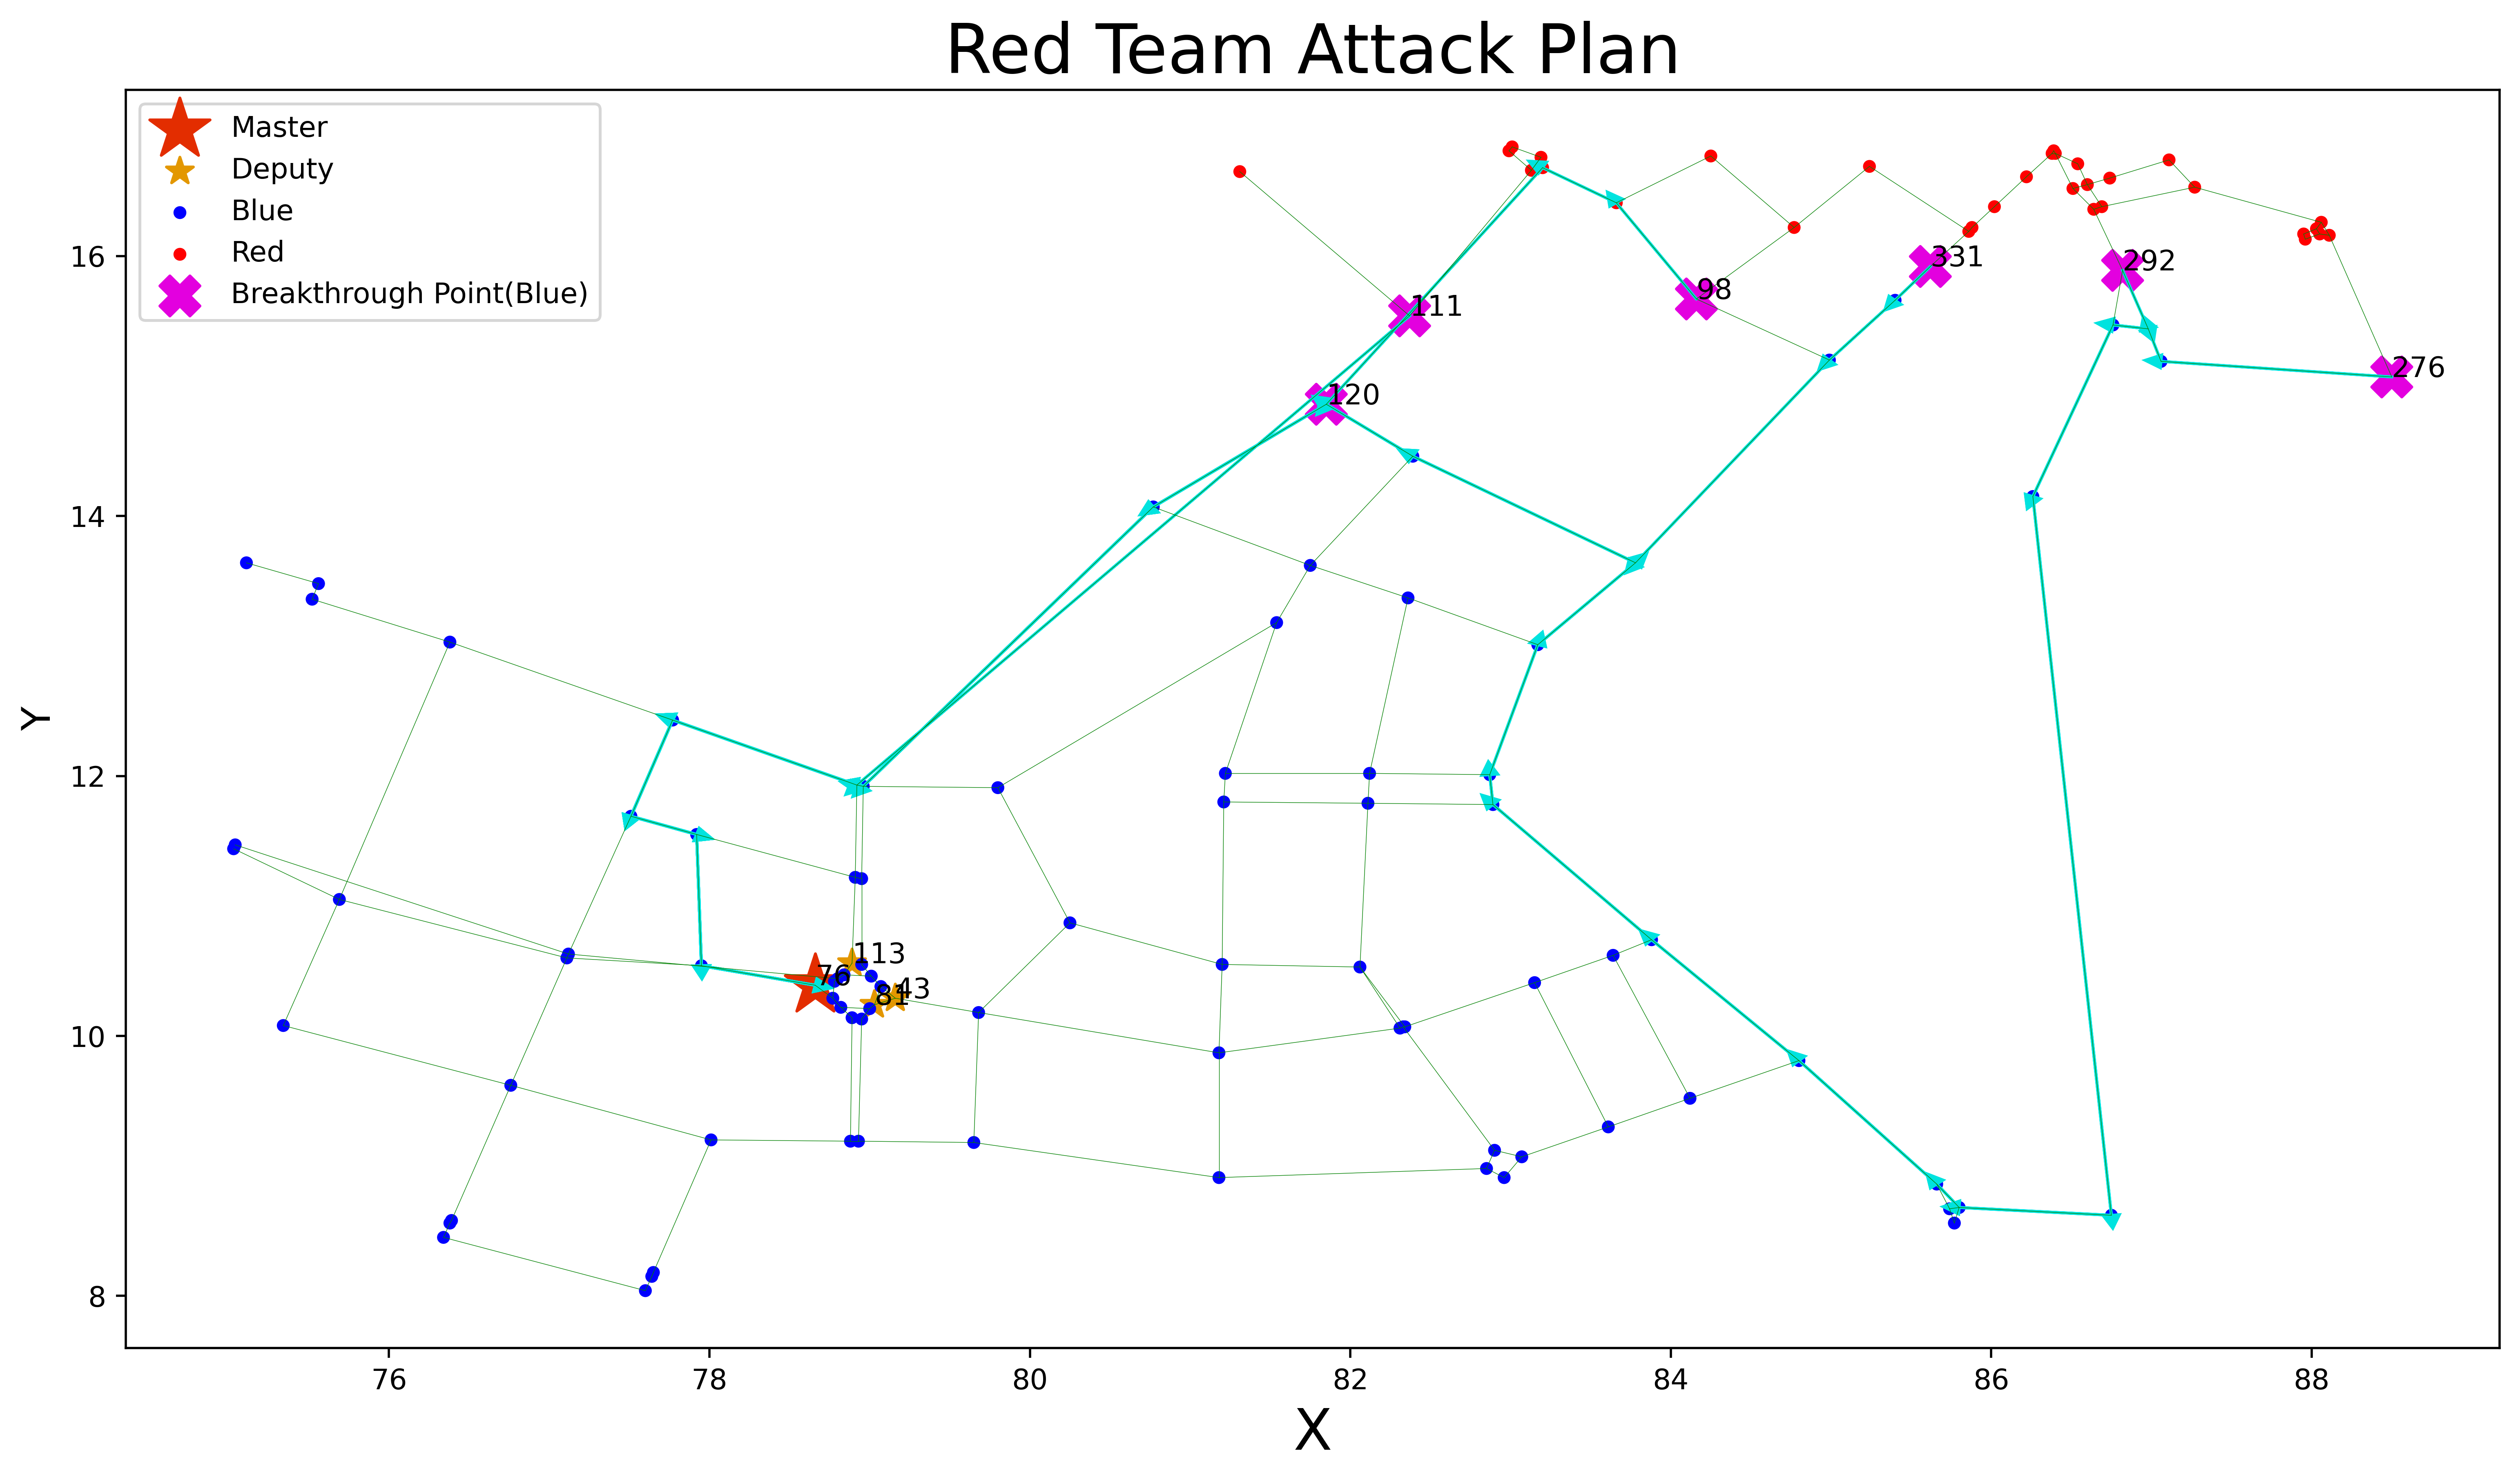

In [91]:
import math
# 绘制攻击路线图

# 构建点
points = []
masterPoint = []
deputyPoint = []
commonPoint = []
redPoint = []
breakthroughPoint = []
breakthroughPointIdList = [111, 120, 98, 331, 292, 276]
for row in pointList:
    id_ = row[0]
    x = row[1]
    y = row[2]
    if 75 < x and x < 90 and 8 < y and y < 17:
        points.append([x, y, id_, "#e32d00", "*", "master", 500])
        redPoint.append([x, y, id_, "r", ".", "point", 50])

for row in pointEnemyList:
    id_ = row[0]
    x = row[1]
    y = row[2]
    if 75 < x and x < 90 and 8 < y and y < 17:
        if id_ in [76]:
            # 主基地
            points.append([x, y, id_, "#e32d00", "*", "master", 500])
            masterPoint.append([x, y, id_, "#e32d00", "*", "master", 500])
        elif id_ in [113, 81, 43]:
            # 副基地
            points.append([x, y, id_, "#e39700", ",", "deputy", 100])
            deputyPoint.append([x, y, id_, "#e39700", ",", "deputy", 100])
        else:
            points.append([x, y, id_, "b", ".", "point", 50])
            if id_ not in breakthroughPointIdList:
                commonPoint.append([x, y, id_, "b", ".", "point", 50])
            else:
                breakthroughPoint.append([x, y, id_, "#e300df", ".", "point", 200])

plt.close()
plt.figure(dpi=500, figsize=(15, 8))
plt.title(f"Red Team Attack Plan", fontsize=24)
# plt.axis([70, 100, 0, 30])
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=14)
# 画点
existFlag = []

masterPoint = np.array(masterPoint)
plt.scatter(
    np.array(masterPoint[:, [0]], float),
    np.array(masterPoint[:, [1]], float),
    color='#e32d00',
    s=np.array(masterPoint[:, [6]], float),
    marker='*',
    label="Master",
)
deputyPoint = np.array(deputyPoint)
plt.scatter(
    np.array(deputyPoint[:, [0]], float),
    np.array(deputyPoint[:, [1]], float),
    color='#e39700',
    s=np.array(deputyPoint[:, [6]], float),
    marker='*',
    label="Deputy",
)
commonPoint = np.array(commonPoint)
plt.scatter(
    np.array(commonPoint[:, [0]], float),
    np.array(commonPoint[:, [1]], float),
    color='b',
    s=np.array(commonPoint[:, [6]], float),
    marker='.',
    label="Blue",
)
redPoint = np.array(redPoint)
plt.scatter(
    np.array(redPoint[:, [0]], float),
    np.array(redPoint[:, [1]], float),
    color='r',
    s=np.array(redPoint[:, [6]], float),
    marker='.',
    label="Red",
)
breakthroughPoint = np.array(breakthroughPoint)
plt.scatter(
    np.array(breakthroughPoint[:, [0]], float),
    np.array(breakthroughPoint[:, [1]], float),
    color='#e300df',
    s=np.array(breakthroughPoint[:, [6]], float),
    marker='X',
    label="Breakthrough Point(Blue)",
)

# 连线
pointId = np.array(np.mat(np.array(points)[:, [2]],dtype=float).T,int)[0].tolist()
for row in list(sheet_distance.values)[1:]:
    fromId = int(row[1])
    toId = int(row[2])
    if (fromId not in pointId or toId not in pointId):
        continue
    x = [pointMap[fromId][1], pointMap[toId][1]]
    y = [pointMap[fromId][2], pointMap[toId][2]]
    plt.plot(x, y, color="g", linewidth=0.2)

# 进攻路线
for row in redTeamAttackPlan[:, :]:
    row = (row[row != 'None']).tolist()
    arr = list(map(int, row))
    for idx in range(1, len(arr)):
        fromId = arr[idx - 1]
        toId = arr[idx]
        x = [pointMap[fromId][1], pointMap[toId][1]]
        y = [pointMap[fromId][2], pointMap[toId][2]]
        plt.arrow(x[0], y[0], x[1] -x[0], y[1] -y[0], color="#00e3df",head_width=0.1, head_length=0.1)

# 标注点id
for row in points:
    if row[2] in [113, 81, 43] + [76] + breakthroughPointIdList:
        plt.text(row[0], row[1], int(row[2]), fontsize=10)
plt.legend(loc=2)
plt.savefig("./Red Team Attack Plan.png")
plt.show()

In [96]:
# 导入攻击路线图
wb = load_workbook("./通讯中断的撤退路线.xlsx")
retreatPlanSheet = wb.worksheets[0]
retreatPlan = np.array(list(retreatPlanSheet.values), str)[1:, 1:]
retreatPlanLinerList = retreatPlan.reshape(-1)
retreatPlanLinerList = np.array(np.unique(retreatPlanLinerList[retreatPlanLinerList != 'None']), int)


array([111, 112, 113, 117, 118, 120, 121, 122, 123, 124, 125, 130, 131,
       132, 133, 134, 135, 138, 139, 140, 143, 144, 160, 161, 162, 163,
       165, 236,  25,  26,  27, 276,  28, 288,  29, 292, 293, 294, 295,
       296, 297, 298, 299,  30, 300, 301, 304, 305, 306, 307, 308,  31,
       311, 312, 313, 314,  32, 329,  33, 330, 331, 332, 333, 334, 335,
       336, 337, 338, 339,  34, 340, 341, 342, 348, 349,  35, 350,  36,
       368, 369,  37, 372, 373, 374, 375, 376, 377, 378, 379,  38, 380,
       381, 382, 383, 384, 385, 386, 387, 388,  39,  40,  41,  42, 428,
       429,  43, 430, 431, 432, 433, 434, 435, 436,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98])

In [ ]:
import math
# 绘制撤退路线

# 构建点
points = []
masterPoint = []
deputyPoint = []
commonPoint = []
redPoint = []
breakthroughPoint = []
breakthroughPointIdList = [111, 120, 98, 331, 292, 276]
for row in pointList:
    id_ = row[0]
    x = row[1]
    y = row[2]
    if 75 < x and x < 90 and 8 < y and y < 17:
        points.append([x, y, id_, "#e32d00", "*", "master", 500])
        redPoint.append([x, y, id_, "r", ".", "point", 50])

for row in pointEnemyList:
    id_ = row[0]
    x = row[1]
    y = row[2]
    if 75 < x and x < 90 and 8 < y and y < 17:
        if id_ in [76]:
            # 主基地
            points.append([x, y, id_, "#e32d00", "*", "master", 500])
            masterPoint.append([x, y, id_, "#e32d00", "*", "master", 500])
        elif id_ in [113, 81, 43]:
            # 副基地
            points.append([x, y, id_, "#e39700", ",", "deputy", 100])
            deputyPoint.append([x, y, id_, "#e39700", ",", "deputy", 100])
        else:
            points.append([x, y, id_, "b", ".", "point", 50])
            if id_ not in breakthroughPointIdList:
                commonPoint.append([x, y, id_, "b", ".", "point", 50])
            else:
                breakthroughPoint.append([x, y, id_, "#e300df", ".", "point", 200])

plt.close()
plt.figure(dpi=500, figsize=(15, 8))
plt.title(f"Red Team Attack Plan", fontsize=24)
# plt.axis([70, 100, 0, 30])
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=14)
# 画点
existFlag = []

masterPoint = np.array(masterPoint)
plt.scatter(
    np.array(masterPoint[:, [0]], float),
    np.array(masterPoint[:, [1]], float),
    color='#e32d00',
    s=np.array(masterPoint[:, [6]], float),
    marker='*',
    label="Master",
)
deputyPoint = np.array(deputyPoint)
plt.scatter(
    np.array(deputyPoint[:, [0]], float),
    np.array(deputyPoint[:, [1]], float),
    color='#e39700',
    s=np.array(deputyPoint[:, [6]], float),
    marker='*',
    label="Deputy",
)
commonPoint = np.array(commonPoint)
plt.scatter(
    np.array(commonPoint[:, [0]], float),
    np.array(commonPoint[:, [1]], float),
    color='b',
    s=np.array(commonPoint[:, [6]], float),
    marker='.',
    label="Blue",
)
redPoint = np.array(redPoint)
plt.scatter(
    np.array(redPoint[:, [0]], float),
    np.array(redPoint[:, [1]], float),
    color='r',
    s=np.array(redPoint[:, [6]], float),
    marker='.',
    label="Red",
)
breakthroughPoint = np.array(breakthroughPoint)
plt.scatter(
    np.array(breakthroughPoint[:, [0]], float),
    np.array(breakthroughPoint[:, [1]], float),
    color='#e300df',
    s=np.array(breakthroughPoint[:, [6]], float),
    marker='X',
    label="Breakthrough Point(Blue)",
)

# 连线
pointId = np.array(np.mat(np.array(points)[:, [2]],dtype=float).T,int)[0].tolist()
for row in list(sheet_distance.values)[1:]:
    fromId = int(row[1])
    toId = int(row[2])
    if (fromId not in pointId or toId not in pointId):
        continue
    x = [pointMap[fromId][1], pointMap[toId][1]]
    y = [pointMap[fromId][2], pointMap[toId][2]]
    plt.plot(x, y, color="g", linewidth=0.2)

# 进攻路线
for row in redTeamAttackPlan[:, :]:
    row = (row[row != 'None']).tolist()
    arr = list(map(int, row))
    for idx in range(1, len(arr)):
        fromId = arr[idx - 1]
        toId = arr[idx]
        x = [pointMap[fromId][1], pointMap[toId][1]]
        y = [pointMap[fromId][2], pointMap[toId][2]]
        plt.arrow(x[0], y[0], x[1] -x[0], y[1] -y[0], color="#00e3df",head_width=0.1, head_length=0.1)

# 标注点id
for row in points:
    if row[2] in [113, 81, 43] + [76] + breakthroughPointIdList:
        plt.text(row[0], row[1], int(row[2]), fontsize=10)
plt.legend(loc=2)
plt.savefig("./Red Team Attack Plan.png")
plt.show()